# Scipy

Модуль scipy содержит множество инструментом, предназначенных для решения задач в научных вычислениях. 

Его различные подмодули соответствуют различным областям применения таким как: интерполяция, оптимизация, обработка картинок, статистика, специальные функции и другие.

In [1]:
import numpy as np

In [2]:
import scipy

# scipy.io

 https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io

Этот модуль предоставляет возможности для чтения разных форматов данных: от numpy массивов до картинок

In [3]:
import scipy.io

Создадим массив

In [4]:
arr = np.array(
    [
        [1, 0, 4], 
        [2, 0, 4], 
        [4, 0, 4], 
        [8, 0, 4], 
        [16, 0, 4], 
        [32, 0, 4]
    ],
    dtype=np.int64
)

Очень популярен формат среды MATLAB для хранения данных, давайте сохраним файл в нём.

In [5]:
scipy.io.savemat('file.mat', {'arr': arr})

Проверим появившийся файл

In [6]:
!cat file.mat

"cat" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


Мы видим служебную информацию, а также какие-то странные символы.

Это сохраняемые данные в бинарном формате (так делается, чтобы меньше места занимать на диске).

Теперь восстановим сохранённый массив

In [7]:
restored_struct = scipy.io.loadmat('file.mat', struct_as_record=True)

In [8]:
restored_struct

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file Platform: nt, Created on: Thu Oct 25 14:22:00 2018',
 '__version__': '1.0',
 'arr': array([[ 1,  0,  4],
        [ 2,  0,  4],
        [ 4,  0,  4],
        [ 8,  0,  4],
        [16,  0,  4],
        [32,  0,  4]], dtype=int64)}

Помимо наших данных видим и дополнительную инфорацмю. Двухмерный массив совпадает с тем, что мы сохраняли.

In [9]:
arr == restored_struct['arr']

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

Существуют и другие форматы, которые можно читать с помощью scipy.io: https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

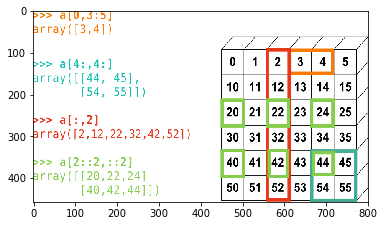

In [11]:
plt.imshow(plt.imread('numpy_indexing.png'))

### Выводы

С помощью Scipy можно читать и сохранять различные форматы данных.

# scipy.special

https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special

В математике есть набор функций, которые невозможно записать при помощи привычных нам функций (тригонометрических, логарифмов, экспонент и т.д.).

Такие функции можно только приближённо вычислять и модуль scipy.special предоставляет такую возможность.

Например, $erf(x) = \frac{2}{\sqrt{\pi}} \int\limits_{0}^{x} e^{-t^2} dt$ является такой функцией, но её можно вычислять в scipy.special

In [12]:
import scipy.special

In [13]:
scipy.special.erf(0.1)

0.1124629160182849

In [14]:
scipy.special.erf(0.2)

0.22270258921047845

Численно посчитаем производную в точке 0.2

In [15]:
(scipy.special.erf(0.2 +  0.0001) - scipy.special.erf(0.2)) / 0.0001

1.0841131010844163

И она совпадёт со значнением подынтегрального выражения в точке 0.2 

In [16]:
2. / np.sqrt(np.pi) * np.exp(- 0.2 ** 2)

1.084134787104863

Подробности можно прочитать в документации

### Выводы:
scipy позволяет вычислять сложные функции, которые нельзя легко выписать

# scipy.linalg

https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg

Линейная алгебра — раздел математики, изучающий объекты линейной природы: вектора, системы линейных уравнений,  матрицы. Среди основных инструментов, используемых в линейной алгебре — определители, матрицы, транспонирование. scipy.linalg посзволяет производить эти операции.

In [17]:
import scipy.linalg

Создадим матрицу

In [18]:
arr = np.array(
    [
        [1, 2],
        [3, 4]
    ]
)

In [19]:
arr

array([[1, 2],
       [3, 4]])

Может найти определитель этой матрицы.

Для матриц 2 на 2 он равен arr[0, 0] \* arr[1, 1] - arr[1, 0] \* arr[0, 1]

In [20]:
scipy.linalg.det(arr)

-2.0

In [21]:
arr[0, 0] * arr[1, 1] - arr[1, 0] * arr[0, 1]

-2

Можем найти обратную матрицу

Обратная матрица к матрице $A$, это такая матрица $B$,  что $A \times B = E$, а $E$ - это матрица, у которой везде кроме диагонали нули, а на диалогали единицы.

In [22]:
inv_arr = scipy.linalg.inv(arr)

inv_arr

In [23]:
np.dot(arr, inv_arr)

array([[  1.00000000e+00,   0.00000000e+00],
       [  8.88178420e-16,   1.00000000e+00]])

Не точные нули получаются из-за точности вычислений

Также можно решать линейные системы уравнений.

$2x + y + 3z = 9$

$x - 2y + z = -2$

$3x + 2y + 2z = 7$



Cоздадим соответсвующие массивы и матрицы

In [24]:
A = np.array([
    [2, 1, 3],
    [1, -2, 1],
    [3, 2, 2]
])

b = np.array([9, 2, 7])

Тогда система уравнений равносильна тому, что найти такой массив [x, y, z], что

np.dot(A, [x, y, z]) == b

In [25]:
solution = scipy.linalg.solve(A, b)

In [26]:
solution

array([ 0.23076923,  0.46153846,  2.69230769])

In [27]:
np.dot(A, solution)

array([ 9.,  2.,  7.])

Матрица должна быть обратима

In [28]:
A = np.array([
    [2, 1, 3],
    [2, 1, 3],
    [0, 0, 1]
])

b = np.array([1, 1, 1])

In [29]:
scipy.linalg.solve(A, b)

LinAlgError: singular matrix

Можно считать длины векторов (значения массива можно считать координатами и тогда это будет вектор)

In [ ]:
vec = np.array([0, 3, 4])

In [ ]:
scipy.linalg.norm(vec) # sqrt(0 **2 + 3 ** 2 + 4 ** 2)

Соответсвенно расстояние между двумя точками будет считатся так

In [ ]:
a = np.array([1, 5])
b = np.array([-3, 2])
scipy.linalg.norm(a - b)

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(np.arange(-6, 7, 1))
ax.set_yticks(np.arange(-6, 7, 1))
plt.scatter([1, -3], [5, 2])
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.grid()

In [ ]:
def points_dist(fst_point, snd_point):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xticks(np.arange(-6, 7, 1))
    ax.set_yticks(np.arange(-6, 7, 1))
    plt.scatter([fst_point[0], snd_point[0]], [fst_point[1], snd_point[1]])
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.grid()
    plt.plot([fst_point[0], snd_point[0]], [fst_point[1], snd_point[1]])
    print(scipy.linalg.norm(np.array(fst_point) - np.array(snd_point)))

In [ ]:
points_dist([0, 0], [3, 4])

In [ ]:
points_dist([-3, -6], [2, 6])

### Выводы:
scipy можно использовать для работы с матрицами и векторами

# scipy.optimize

https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize

При помощи scipy можно решать различные задачи оптимизации. scipy предоставляет целый набор различных методов оптимизации.

In [ ]:
import scipy.optimize

Определим какую-нибудь функцию

In [ ]:
def f(x):
    return x ** 2 + 10 * np.sin(x) + 4 * np.cos(x / 2.)

И нарисуем её график

In [ ]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show()

Мы видим локальный минимум в окрестности точки -1.5

scipy предоставляет общий способ нахождения минимума функции. Ему нужно передать саму функцию и начальное приближение, начиная с которого алгоритм будет искать минимум

In [ ]:
res = scipy.optimize.fmin_bfgs(f, -5)[0]

bfgs - название метода оптимизации

In [ ]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.scatter([res], [f(res)])
plt.show()

Если выбрать неудачное начальное приближение, то возможно будет найден локальный, а не глобальный минимум

In [ ]:
res = scipy.optimize.fmin_bfgs(f, -10)[0]
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.scatter([res], [f(res)])
plt.show()

In [ ]:
res = scipy.optimize.fmin_bfgs(f, 5)[0]
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.scatter([res], [f(res)])
plt.show()

Есть общий интерфейс для минимизации

In [ ]:
scipy.optimize.minimize(f, 0)

In [ ]:
scipy.optimize.minimize(f, 5)

### Выводы:
при помощи scipy можно оптимизировать произвольные функции

# Задача линейного программирования

Колхоз имеет возможность приобрести не более 19 трехтонных автомашин и не более 17 пятитонных. Отпускная цена трехтонного грузовика - 4000 руб., пятитонного - 5000 руб. Колхоз может выделить для приобретения автомашин 141 тысяч рублей. Сколько нужно приобрести автомашин, чтобы их суммарная грузоподъемность была максимальной?

$x$ - число трёхтонных машин

$y$ - число пятитонных машин

$4x + 5y$ - затраты на покупку машин в тысячах рублей

$3x + 5y$ - суммарная грузоподъёмность


Нужно решить задачу:

$3x + 5y \to max$

С ограничениями:

$0 \leq x \leq 19$

$0 \leq y \leq 17$

$4x + 5y \leq 141$

In [ ]:
c = [-3, -5]
A_ub = [
    [4, 5],
    [1, 0],
    [0, 1]
]
b_ub = [
    141,
    19,
    17
]

scipy.optimize.linprog(c=c, A_ub=A_ub, b_ub=b_ub)

Пусть теперь пятитонные и шеститонные грузовики

In [ ]:
c = [-5, -6]
A_ub = [
    [4, 5],
    [1, 0],
    [0, 1]
]
b_ub = [
    141,
    19,
    17
]

scipy.optimize.linprog(c=c, A_ub=A_ub, b_ub=b_ub)